In [1]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os
import tiktoken

In [2]:
# Load biến môi trường từ file .env
load_dotenv(".env")
user = os.getenv('DB_USER')
password = os.getenv('DB_PASSWORD')
host = os.getenv('DB_HOST')
port = os.getenv('DB_PORT')
db_name = os.getenv('DB_NAME')

In [3]:
# Chuỗi kết nối
connection_string = f"mysql+pymysql://{user}:{password}@{host}:{port}/{db_name}?charset=utf8mb4"

In [4]:
engine = create_engine(connection_string)

In [5]:
query = "SELECT * FROM pd_dieu;"  # Thay your_table_name bằng tên bảng của bạn
df = pd.read_sql(query, engine)

In [15]:
df.head()

,mapc,ten,noidung,chimuc,vbqppl,vbqppl_link,stt,demuc_id,chuong_id,chude_id
0,0100100000000000100000100000000000000000,Điều 1.1.LQ.1. Phạm vi điều chỉnh,Luật này quy định về chính sách an ninh quốc g...,1,Điều 1 Luật số 32/2004/QH11 An ninh Quốc gia n...,http://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Item...,0,55323c64-e78f-4537-afcd-6a3c2af3c71d,01001000000000001000,c3b69131-2931-4f67-926e-b244e18e8081
1,0100100000000000100000200000000000000000,Điều 1.1.LQ.2. Đối tượng áp dụng,"Luật này áp dụng đối với cơ quan, tổ chức, côn...",2,"Điều 2 Luật số 32/2004/QH11, có hiệu lực thi h...",http://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Item...,1,55323c64-e78f-4537-afcd-6a3c2af3c71d,01001000000000001000,c3b69131-2931-4f67-926e-b244e18e8081
2,0100100000000000100000240220600016000010,Điều 1.1.NĐ.1.1. Phạm vi điều chỉnh,Nghị định này quy định việc khôi phục danh dự ...,1,Điều 1 Nghị định số 16/2006/NĐ-CP Quy định về ...,http://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Item...,2,55323c64-e78f-4537-afcd-6a3c2af3c71d,01001000000000001000,c3b69131-2931-4f67-926e-b244e18e8081
3,0100100000000000100000240221420038000010,"Điều 1.1.NĐ.2.1. Phạm vi điều chỉnh, đối tượng...","Nghị định này quy định về chức năng, nhiệm vụ,...",1,Điều 1 Nghị định số 38/2006/NĐ-CP Về Bảo vệ dâ...,http://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Item...,3,55323c64-e78f-4537-afcd-6a3c2af3c71d,01001000000000001000,c3b69131-2931-4f67-926e-b244e18e8081
4,0100100000000000100000240223350127000010,Điều 1.1.NĐ.3.1. Phạm vi điều chỉnh,Nghị định này quy định chi tiết thi hành một s...,1,Điều 1 Nghị định số 127/2006/NĐ-CP Quy định về...,http://vbpl.vn/TW/Pages/vbpq-toanvan.aspx?Item...,4,55323c64-e78f-4537-afcd-6a3c2af3c71d,01001000000000001000,c3b69131-2931-4f67-926e-b244e18e8081


In [20]:
tokenizer = tiktoken.get_encoding("cl100k_base")

In [22]:
df["len_noidung"] = df["noidung"].apply(lambda x: len(tokenizer.encode(x)))

In [24]:
df["len_noidung"].describe()

count    49573.000000
mean       556.346761
std        746.481513
min          0.000000
25%        178.000000
50%        352.000000
75%        678.000000
max      23148.000000
Name: len_noidung, dtype: float64

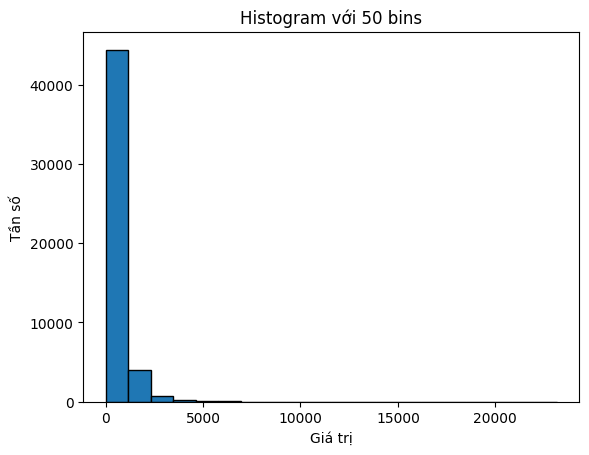

In [23]:
plt.hist(df['len_noidung'], bins=20, edgecolor='black')

# Thêm tiêu đề và nhãn
plt.title('Histogram với 50 bins')
plt.xlabel('Giá trị')
plt.ylabel('Tần số')

# Hiển thị biểu đồ
plt.show()